In [67]:
import pandas as pd
import numpy as np
import nibabel as nib
import os

site1FD = pd.read_csv('./results/thresh0.8/training_labels.csv', index_col=1).loc[:,['age','female','meanFD','righthanded']]
site1FD = site1FD.drop_duplicates()
site1FD.describe().to_csv('./results/thresh0.8/site1_FDsummary.csv')
site2FD = pd.read_csv('./results/thresh0.8/testing_labels.csv', index_col=1).loc[:,['age','female','meanFD','righthanded']]
site2FD = site2FD.drop_duplicates()
site2FD.describe().to_csv('./results/thresh0.8/site2_FDsummary.csv')

site1 = pd.read_csv('./results/thresh0.8/training_labels.csv', index_col=1).loc[:,['age','female','righthanded']]
site1 = site1.drop_duplicates()
site1.loc[site1['righthanded']==3,'righthanded']=1
site1.describe().to_csv('./results/thresh0.8/site1_Demogsummary.csv')
site2 = pd.read_csv('./results/thresh0.8/testing_labels.csv', index_col=1).loc[:,['age','female','righthanded']]
site2 = site2.drop_duplicates()
site2.loc[site2['righthanded']==3,'righthanded']=1
site2.describe().to_csv('./results/thresh0.8/site2_Demogsummary.csv')

In [47]:
clin = pd.read_csv('/Users/catcamacho/Box/CCP/HBN_study/phenotypic_data/full_sample_internqs_20210527.csv', index_col=0)
clin['sub'] = ['sub-' + a for a in clin.index]
clin['subject_id'] = clin.index
clin.index = clin['sub']
summary_clin = clin.loc[:,['CBCL_Int', 'CBCL_Ext', 'CBCL_Total', 'MDD_mean', 'SocAnx_mean', 'Panic_mean', 'DMDD_mean', 
                           'MFQ_SR_Total','MFQ_P_Total', 'SCARED_SR_GD','SCARED_SR_PN','SCARED_SR_SC','SCARED_SR_SH',
                           'SCARED_SR_SP','SCARED_SR_Total','SCARED_P_GD','SCARED_P_PN','SCARED_P_SC','SCARED_P_SH',
                           'SCARED_P_SP','SCARED_P_Total','dx_text','dx_dep','dx_anx','dx_nd_adhd','dx_nd_asd','dx_nd_int',
                           'dx_nd_learn','dx_nd_com','dx_nd_mot','dx_nd_oth','dx_sub','dx_disr','dx_trauma','dx_psy','dx_ocd',
                           'dx_elim','dx_bip','dx_eat']]
summary_clin

,CBCL_Int,CBCL_Ext,CBCL_Total,MDD_mean,SocAnx_mean,Panic_mean,DMDD_mean,MFQ_SR_Total,MFQ_P_Total,SCARED_SR_GD,...,dx_nd_mot,dx_nd_oth,dx_sub,dx_disr,dx_trauma,dx_psy,dx_ocd,dx_elim,dx_bip,dx_eat
sub,,,,,,,,,,,,,,,,,,,,,
sub-NDARAA075AMK,3.0,1.0,6.0,-0.307692,-0.500000,-0.375000,-0.800000,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sub-NDARAA112DMH,13.0,20.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
sub-NDARAA117NEJ,14.0,16.0,60.0,-1.461538,-1.500000,0.076923,-0.100000,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
sub-NDARAA306NT2,28.0,11.0,75.0,1.230769,0.166667,-2.076923,-2.666667,16.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
sub-NDARAA358BPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-NDARZZ284ZDH,1.0,7.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sub-NDARZZ740MLM,0.0,0.0,9.0,0.153846,-0.166667,0.000000,0.266667,NaN,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sub-NDARZZ810LVF,10.0,19.0,43.0,-0.307692,-0.166667,0.307692,1.333333,34.0,10.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

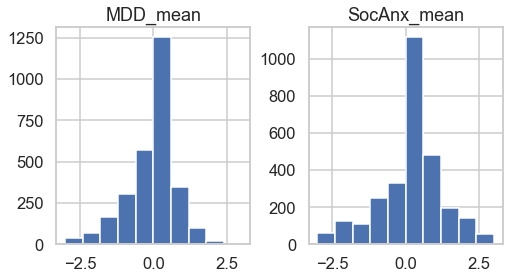

<Figure size 432x288 with 0 Axes>

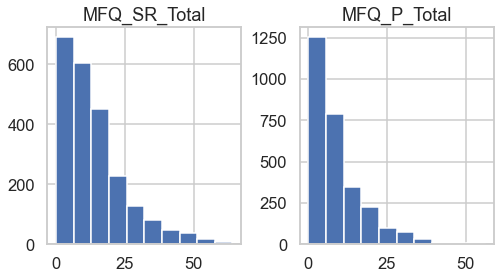

<Figure size 432x288 with 0 Axes>

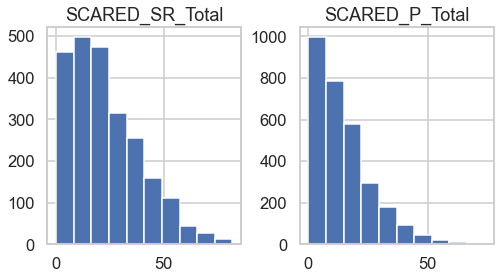

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='talk', style='whitegrid')
plt.figure()
summary_clin[['MDD_mean','SocAnx_mean']].hist(figsize=(8,4))
plt.savefig('ESWAN_hist.svg')
plt.figure()
summary_clin[['MFQ_SR_Total','MFQ_P_Total']].hist(figsize=(8,4))
plt.savefig('MFQ_hist.svg')
plt.figure()
summary_clin[['SCARED_SR_Total','SCARED_P_Total']].hist(figsize=(8,4))
plt.savefig('SCARED_hist.svg')

In [48]:
meds = pd.read_csv('/Users/catcamacho/Box/CCP/HBN_study/phenotypic_data/mri_visit_meds.csv', index_col=0, header=0)
meds = meds.drop_duplicates()
meds['takes_meds'] = meds['medications #1']
meds['med_type'] = meds.loc[:,['med_type_01 #1','med_type_02 #1','med_type_03 #1']].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)
meds['med_name'] = meds.loc[:,['med_name_01 #1','med_name_02 #1','med_name_03 #1']].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)
summary_meds = meds[['takes_meds','med_type','med_name']]
summary_meds

,takes_meds,med_type,med_name
sub,,,
sub-NDARWY198BVY,1.0,"ADHD-Non Stimulant, ADHD-Stimulant, nan","Intuniv, Methylphenidate, nan"
sub-NDARBN187GUQ,0.0,"nan, nan, nan","nan, nan, nan"
sub-NDARLE222HJ5,1.0,"Antipsychotics, ADHD-Non Stimulant, ADHD-Stimu...","Respadone, Guanfacine, Adderall XR"
sub-NDAREK947FYP,0.0,"nan, nan, nan","nan, nan, nan"
sub-NDARNG689AAP,0.0,"nan, nan, nan","nan, nan, nan"
...,...,...,...
sub-NDARJM239GN4,0.0,"nan, nan, nan","nan, nan, nan"
sub-NDARBE123PWH,0.0,"nan, nan, nan","nan, nan, nan"
sub-NDARXG670HFE,0.0,"nan, nan, nan","nan, nan, nan"


In [69]:
site1data = site1.merge(summary_clin, left_index=True, right_index=True)
#site1data = site1data.merge(summary_meds, left_index=True, right_index=True)
site1data.describe().to_csv('./results/thresh0.8/site1_Clinsummary.csv')

In [56]:
site2data = site2.merge(summary_clin, left_index=True, right_index=True)
#site2data = site2data.merge(summary_meds, left_index=True, right_index=True)
site2data.describe().to_csv('./results/thresh0.8/site2_Clinsummary.csv')

In [63]:
from scipy.stats import ttest_ind
t, p = ttest_ind(site1FD['meanFD'],site2FD['meanFD'])
print('Mean FD t={0}, p={1}'.format(round(t,2), round(p,3)))

t, p = ttest_ind(site1['age'],site2['age'])
print('Age t={0}, p={1}'.format(round(t,2), round(p,3)))

for a in ['MDD_mean','SocAnx_mean','MFQ_SR_Total','MFQ_P_Total','SCARED_SR_Total','SCARED_P_Total']:
    t, p = ttest_ind(site1data[a], site2data[a], nan_policy='omit')
    print('{0} t={1}, p={2}'.format(a, round(t,2), round(p,3)))

Mean FD t=15.59, p=0.0
Age t=3.28, p=0.001
MDD_mean t=-0.78, p=0.435
SocAnx_mean t=0.02, p=0.981
MFQ_SR_Total t=-1.2, p=0.23
MFQ_P_Total t=-1.63, p=0.104
SCARED_SR_Total t=-0.57, p=0.572
SCARED_P_Total t=-0.8, p=0.424


In [71]:
from scipy.stats import chisquare

x, p = ttest_ind(site1['female'],site2['female'])
print('female X={0}, p={1}'.format(round(x,2), round(p,3)))

x, p = ttest_ind(site1['righthanded'],site2['righthanded'])
print('right-handed X={0}, p={1}'.format(round(x,2), round(p,3)))

female X=1.77, p=0.077
right-handed X=0.09, p=0.925


In [70]:
site1data = site1data.dropna()
site2data = site2data.dropna()

x, p = ttest_ind(site1data['dx_anx'],site2data['dx_anx'])
print('Anxiety Dx X={0}, p={1}'.format(round(x,2), round(p,3)))

x, p = ttest_ind(site1data['dx_dep'],site2data['dx_dep'])
print('Depression Dx X={0}, p={1}'.format(round(x,2), round(p,3)))

Anxiety Dx X=-0.24, p=0.812
Depression Dx X=-0.47, p=0.637
